### Calculating Fourier series
The fourir series of a function is
$$
f(t)=\frac{a_{0}}{2}+\sum_{n=1}^{\infty} a_{n} \cos n t+\sum_{n=1}^{\infty} b_{n} \sin n t
$$

where the coefficients are given by

$$
\begin{aligned}
&a_{n}=\frac{1}{L} \int_{-L}^{L} f(t) \cos n t d t \text { for all } n \geq 0, \\
&b_{n}=\frac{1}{L} \int_{-L}^{L} f(t) \sin n t d t \text { for all } n \geq 1
\end{aligned}
$$


In [1]:
from scipy.fft import fft, fftfreq
from scipy.signal import square, sawtooth
from scipy.io.wavfile import read
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def a(L,n,f):
    if n==0:
        return (1/L) * quad(f,-L,L)[0]
    else:
        return (1/L) * quad(lambda x: f(x)*np.cos((n*np.pi * x)/L),-L,L)[0]

def b(L,n,f):
    return (1/L) * quad(lambda x: f(x)*np.sin((n*np.pi * x)/L),-L,L)[0]

    
def calc_fourier(L,N,f,x):
    s = a(L,0,f)
    
    for n in range(1,N+1):
        s+= a(L,n,f)*np.cos(np.pi*n*x/L) + b(L,n,f) * np.sin(np.pi*n*x/L)
    return s
    

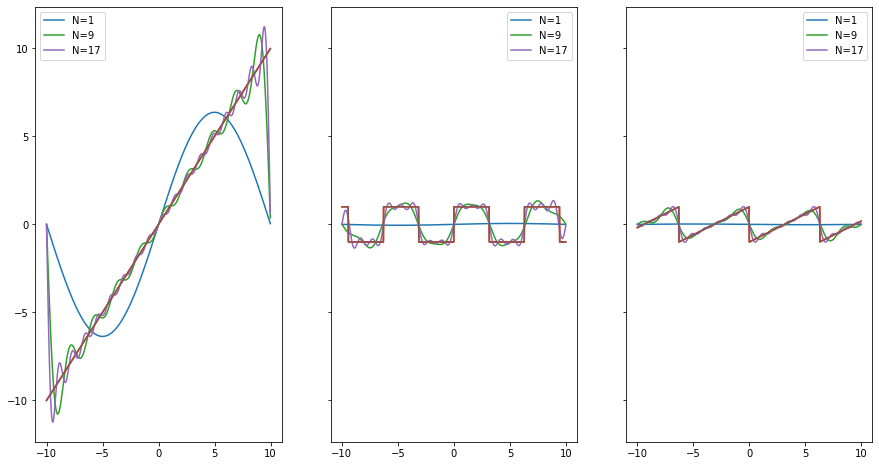

In [3]:
L = 10
x = np.linspace(-L,L,1000,endpoint=False)
y = [lambda x: x, square, sawtooth]


fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,8))
for i in np.arange(1,20,8):
    ax1.plot(x,
             calc_fourier(L,i,y[0],x),
             label=f"N={i}")
    ax1.plot(x,y[0](x))
    ax1.legend(loc='best',prop={'size':10})

    ax2.plot(x,
             calc_fourier(L,i,y[1],x),
             label=f"N={i}")
    ax2.plot(x,y[1](x))
    ax2.legend(loc='best',prop={'size':10})

    ax3.plot(x,
             calc_fourier(L,i,y[2],x),
             label=f"N={i}")
    ax3.plot(x,y[2](x))
    ax3.legend(loc='best',prop={'size':10})


plt.show()

### Discrete signals

The discrete fourier tranform of $N$ data points can be calculatedby the fourier series
$$
y(t)=\sum_{k=0}^{N-1} c_{k} e^{\frac{i 2 \pi k t}{N \Delta t}}
$$

It is
$$
\begin{aligned}
y_{0} &=y(0)=c_{0}+c_{1}+c_{2}+\cdots+c_{N-1} \\
y_{1} &=y(\Delta t)=c_{0}+c_{1} \omega^{1}+c_{2} \omega^{2}+\cdots+c_{N-1} \omega^{N-1} \\
y_{2} &=y(2 \Delta t)=c_{0}+c_{1} \omega^{2}+c_{2} \omega^{4}+\cdots+c_{N-1} \omega^{2(N-1)} \\
& \vdots \\
y_{N-1} &=c_{0}+c_{1} \omega^{N-1}+c_{2} \omega^{2(N-1)}+\cdots+c_{N-1} \omega^{(N-1)(N-1)}
\end{aligned}
$$
where $\omega$ is the N-root of unity.

It is a matter of linar algebra to determine the coefficients $c_i$


##### Simple signals

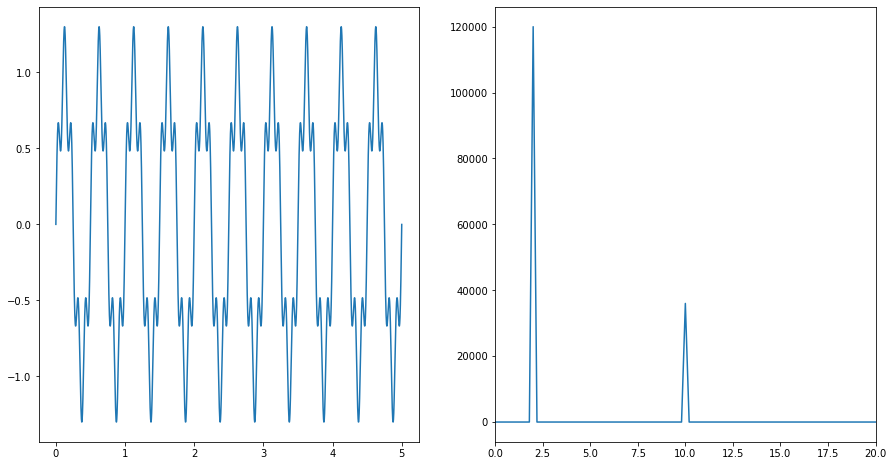

In [4]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

t, nice_tone = generate_sine_wave(2, 48000, 5)
_, noise_tone = generate_sine_wave(10, 48000, 5)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))

ax1.plot(t,mixed_tone)
y = np.abs(fft(mixed_tone))
f = np.arange(0,48000/2,48000 / len(y))
ax2.plot(f, y[:len(f)])
ax2.set_xlim(0,20)
plt.show()

#### Complex Signals

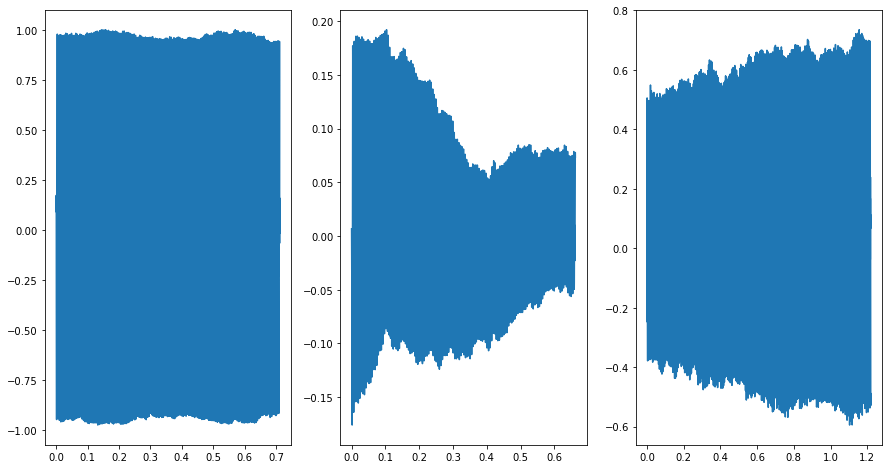

In [7]:
samplerate, clarinet = read('data/clarinet.wav')
_, guitar = read('data/guitar.wav')
_, voice = read('data/voice.wav')

#rescale data
clarinet = clarinet[:,0] / np.max(clarinet[:,0])
guitar = guitar[:,0] / np.max(guitar[:,0])
voice = voice[:,0] / np.max(voice[:,0])


lenC = len(clarinet)
clarinet = clarinet[round(lenC*0.3):round(lenC*0.5)]
lenG = len(guitar)
guitar = guitar[round(lenG*0.3):round(lenG*0.5)]
lenV = len(voice)
voice = voice[round(lenV*0.3):round(lenV*0.5)]

duration_clarinet = len(clarinet)/samplerate
duration_guitar = len(guitar)/samplerate
duration_voice = len(voice)/samplerate

t_clarinet = np.arange(0,duration_clarinet,1/samplerate)
t_guitar = np.arange(0,duration_guitar,1/samplerate)
t_voice = np.arange(0,duration_voice,1/samplerate)[:-1]

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15,8))

ax1.plot(t_clarinet,clarinet)
ax2.plot(t_guitar,guitar)
ax3.plot(t_voice,voice)
plt.show()

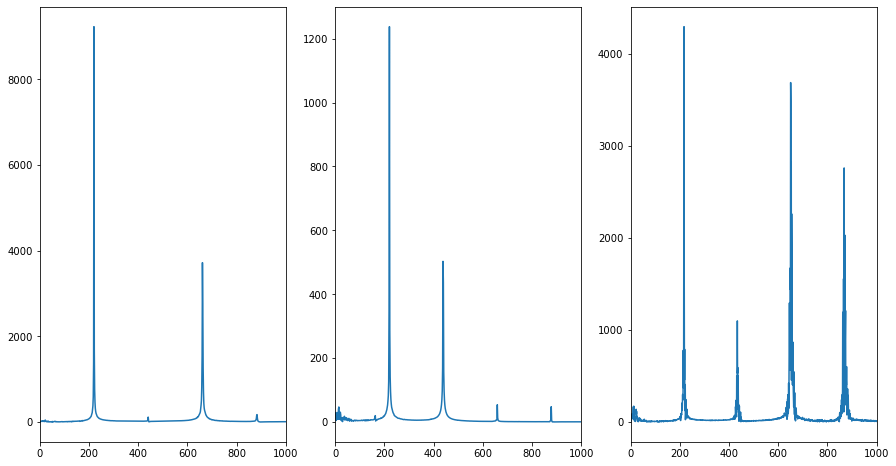

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,8))

y = np.abs(fft(clarinet))
f = np.arange(0,samplerate/2,samplerate / len(y))
ax1.plot(f,y[:len(f)])
ax1.set_xlim(0,1000)

y = np.abs(fft(guitar))
f = np.arange(0,samplerate/2,samplerate / len(y))
ax2.plot(f,y[:len(f)])
ax2.set_xlim(0,1000)

y = np.abs(fft(voice))
f = np.arange(0,samplerate/2,samplerate / len(y))
ax3.plot(f,y[:len(f)])
ax3.set_xlim(0,1000)

plt.show()